# Milestone 3 - Regression Simulation 

## Author 


## Instructions

Using the California dairy production dataset, perform time series analysis on the data for one of Cottage Cheese Production, Milk Production, or Ice Cream Production (your choice) to answer the following questions:

1. Is this time series stationary?
2. Is there a significant seasonal component?
3. For the residual from the STL decomposition of the time series, what is the order of the ARMA(p,q) process that best fits?

Then forecast production for 12 months and report both numeric values and plot the confidence intervals.

1. Are the confidence intervals reasonably small compared to the forecast means?
2. How do the confidence intervals behave as time moves to the future?


### Note
### I use L8 template, but I choose another dataset to answer above questions.
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

#### Data are obtained from https://www.kaggle.com/snehal1405/yellow-stone-national-park

#### "The purpose of possible analysis of this dataset is to propose and inspect the factors that may influence people’s visits to Yellowstone over years, such as weather and climate, travel costs, other macroeconomic factors, and so on."

In [1]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.graphics.tsaplots as splt
import statsmodels.tsa.seasonal as sts
from pmdarima import auto_arima

In [2]:
# laod and read dataset
file = 'datasets_25763_32828_ysnp.csv'
df = pd.read_csv(file)

In [3]:
df.iloc[::,:5].head() 

,Recreation Visits,LowestTemperature(F),HighestTemperature(F),WarmestMinimumTemperature(F),ColdestMaximumTemperature(F)
0,30621,-17.0,37.0,23.0,10.0
1,28091,-17.0,42.0,27.0,2.0
2,26778,-19.0,41.0,26.0,5.0
3,24699,-22.0,43.0,30.0,6.0
4,24766,-14.0,41.0,28.0,14.0


Showing the first five columns of the data, to have a brief idea what data are in the data set. 

In [4]:
df.columns

Index(['Recreation Visits', 'LowestTemperature(F)', 'HighestTemperature(F)',
       'WarmestMinimumTemperature(F)', 'ColdestMaximumTemperature(F)',
       'AverageMinimumTemperature(F)', 'AverageMaximumTemperature(F)',
       'MeanTemperature(F)', 'TotalPrecipitation(In)', 'TotalSnowfall(In)',
       'Max 24hrPrecipitation(In)', 'Max 24hrSnowfall(In)', 'Year/Month/Day',
       '3month Percent Change Airfare Costs',
       '3month Percent Change Food Away From Home Costs',
       '3month Percent Change Gasoline Costs',
       '3month Percent Change Jet Fuel Costs', 'Consumer Price Index',
       'Consumer Sentiment Index', 'Unemployment Rate'],
      dtype='object')

Using `columns`, we can more clearly see whe whole data set.

In [5]:
df.shape

(372, 20)

Data has 372 observations, and 20 attributes in total.



The target variable is Recreation Visits, and the rest are features that might contribute to the Recreation Visits. The 'Year/Month/Day' would be the indciation of time, could set it as index.

In [6]:
df['date'] = pd.to_datetime(df['Year/Month/Day'])
df = df.sort_values('date')
df = df.reset_index()
df.drop(columns=['index'],inplace= True)
df = df.set_index('date')

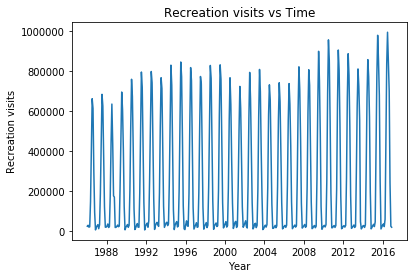

In [7]:
#plot visits vs time
plt.plot(df['Recreation Visits'])
plt.xlabel('Year')
plt.ylabel('Recreation visits')
plt.title('Recreation visits vs Time');


#### 1. Is this time series stationary?
We say that a time series with a constant variance is stationary. The properties of a stationary time series do not vary with time.

But in this trend, it has a significant trend of seasons. Let's plot ACF and PACF to see whether it's stationary.

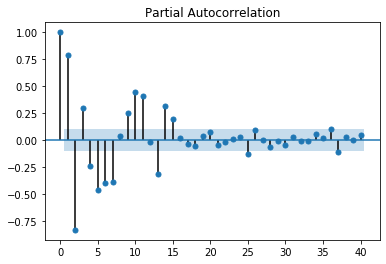

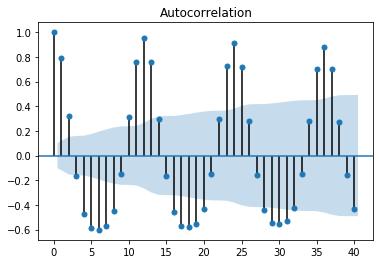

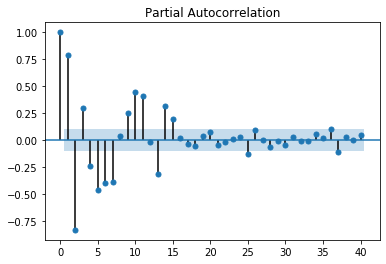

In [8]:
splt.plot_acf(df['Recreation Visits'], lags = 40)
splt.plot_pacf(df['Recreation Visits'], lags = 40,method='ywm')

From ACF and PACF graphs, there are a few significant values for several lags. These are the results of the trend creating dependency from one value to the next. Thus this time series is not stationary, agree with the previous analysis.

#### 2. Is there a significant seasonal component to this time series?
Yes, we can see from autocorrelation that it has negative significant values in June and positive significant value in December, and then the pattern repeats.

#### 3.Perform STL decomposition of the time series. Should this decomposition be performed with the additive or multiplicative (log of values) model? Are the residuals stationary?
This should be multiplicative since the seasonal variation is not constant over time. It increased as time moves to the future.

In [9]:
def decomp_ts(ts, freq = 'M', model = 'additive'):
    res = sts.seasonal_decompose(ts, model = model) #, freq = freq)
    #resplot = res.plot()
    res.plot()
    return(pd.DataFrame({'resid': res.resid, 
                         'trend': res.trend, 
                         'seasonal': res.seasonal},
                       index = ts.index) )

               resid          trend  seasonal
date                                         
1986-01-01       NaN            NaN  0.120161
1986-02-01       NaN            NaN  0.146990
1986-03-01       NaN            NaN  0.080741
1986-04-01       NaN            NaN  0.114398
1986-05-01       NaN            NaN  0.912694
1986-06-01       NaN            NaN  2.244857
1986-07-01  1.060693  197085.083333  3.172521
1986-08-01  1.112475  197310.291667  2.798574
1986-09-01  0.872431  197102.791667  1.716046
1986-10-01  0.847593  197202.875000  0.563010
1986-11-01  0.661175  199211.000000  0.048697
1986-12-01  1.139194  201604.125000  0.081309


,resid,trend,seasonal
date,,,
2016-01-01,0.721473,353211.125000,0.120161
2016-02-01,0.699538,353287.916667,0.146990
2016-03-01,0.802873,353628.291667,0.080741
2016-04-01,1.462699,354108.791667,0.114398
2016-05-01,1.375150,354260.958333,0.912694
2016-06-01,1.052540,354797.458333,2.244857
2016-07-01,NaN,NaN,3.172521
2016-08-01,NaN,NaN,2.798574
2016-09-01,NaN,NaN,1.716046


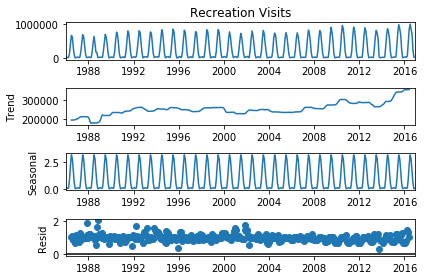

In [10]:
d = decomp_ts(df['Recreation Visits'], model =  'multiplicative')
print(d[:12])
d[-12:]

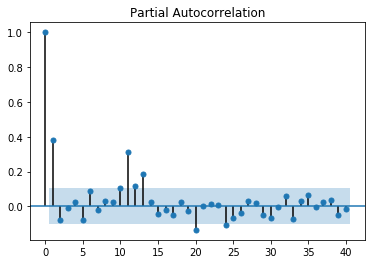

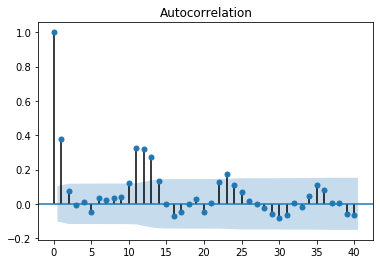

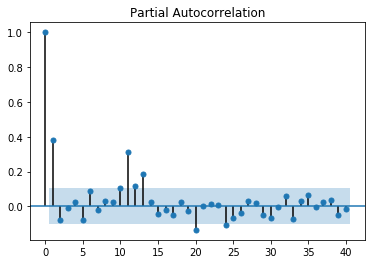

In [11]:
splt.plot_acf(d.resid[6:-6], lags = 40)
splt.plot_pacf(d.resid[6:-6], lags = 40)

From ACF and PACF, residuals are not stationary because there are a few significant values at some lags. Some signs of periodicity which the STL decomposition has not removed.

We can use Dicky Fuller test to further determine if the residual is stationary.The null hypothesis is that the time series is not stationary, but with no trend

In [12]:
from statsmodels.tsa.stattools import adfuller
def DF_Test(ts):
    stationary = adfuller(ts)
    ## Print the results
    print('D-F statistic = ' + str(stationary[0]))
    print('p-value = ' + str(stationary[1]))
    print('number of lags used = ' + str(stationary[2]))
    print('Critical value at 5% confidence = ' + str(stationary[4]['5%']))
    print('Critical value at 10% confidence = ' + str(stationary[4]['10%']))
DF_Test(d.resid[6:-6])    

D-F statistic = -2.344876501912075
p-value = 0.15790244981204427
number of lags used = 12
Critical value at 5% confidence = -2.8699055166063085
Critical value at 10% confidence = -2.571226758215748


Given the DF statistic and large p-value (alpha =0.05), we cannot reject the null hypothesis that the residual is stationary.

### Let's build the model.
First using linear regression to fit the training data, find the residuals. Use residuals to fit ARIMA model. Finally, combine the residual and SARIMA component to make final predictions.

Now that we have explored these data, the next step is to compute and evaluate a forecast model. In this case, we will hold back the last 12 months of data before we train the model. The final 12 months of data can then be used to evaluate the model.

Before spliting the data, we need to preprocess our data set.

In [13]:
df.columns

Index(['Recreation Visits', 'LowestTemperature(F)', 'HighestTemperature(F)',
       'WarmestMinimumTemperature(F)', 'ColdestMaximumTemperature(F)',
       'AverageMinimumTemperature(F)', 'AverageMaximumTemperature(F)',
       'MeanTemperature(F)', 'TotalPrecipitation(In)', 'TotalSnowfall(In)',
       'Max 24hrPrecipitation(In)', 'Max 24hrSnowfall(In)', 'Year/Month/Day',
       '3month Percent Change Airfare Costs',
       '3month Percent Change Food Away From Home Costs',
       '3month Percent Change Gasoline Costs',
       '3month Percent Change Jet Fuel Costs', 'Consumer Price Index',
       'Consumer Sentiment Index', 'Unemployment Rate'],
      dtype='object')

Let's revisit what data are. Temperature would definitely be a factor, but some of them are related to each other. Let's only keep 'AverageMinimumTemperature(F)', 'AverageMaximumTemperature(F)', 'MeanTemperature(F)'. Similar for precipitation and snowfall, let's keep 'TotalPrecipitation(In)', 'TotalSnowfall(In)'. And the rest features are related to costs (economy) and sentiment. I think we can keep it.

Next, we need to take months into account. Extract months first.

In [14]:
df['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
               'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] *int(len(df)/12)

dummies = pd.get_dummies(df['Month'])
df[list(dummies.columns)] = dummies

In [15]:
#check for missing values
df.isnull().sum()

Recreation Visits                                   0
LowestTemperature(F)                                4
HighestTemperature(F)                               4
WarmestMinimumTemperature(F)                        4
ColdestMaximumTemperature(F)                        4
AverageMinimumTemperature(F)                        4
AverageMaximumTemperature(F)                        4
MeanTemperature(F)                                  4
TotalPrecipitation(In)                              4
TotalSnowfall(In)                                   5
Max 24hrPrecipitation(In)                           4
Max 24hrSnowfall(In)                                5
Year/Month/Day                                      0
3month Percent Change Airfare Costs                39
3month Percent Change Food Away From Home Costs     0
3month Percent Change Gasoline Costs                0
3month Percent Change Jet Fuel Costs                0
Consumer Price Index                                0
Consumer Sentiment Index    

Checking for missing values. Removing empty values might discountine time series, intead, replacing missing values with median would be another option. Notice that "3month Percent Change Airfare Costs" has 39 missing values, 10% of the dataset, so taking out this feature for training instead. 

Next, replacing missing values with median.

In [16]:
features = ['AverageMinimumTemperature(F)', 'AverageMaximumTemperature(F)',
       'MeanTemperature(F)', 'TotalPrecipitation(In)', 'TotalSnowfall(In)',
       '3month Percent Change Food Away From Home Costs',
       '3month Percent Change Gasoline Costs',
       '3month Percent Change Jet Fuel Costs', 'Consumer Price Index',
       'Consumer Sentiment Index', 'Unemployment Rate', 'Apr', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']

# replacing missing values for 'AverageMinimumTemperature(F)', 'AverageMaximumTemperature(F)',
#        'MeanTemperature(F)', 'TotalPrecipitation(In)', 'TotalSnowfall(In)'

numeric_list = ['AverageMinimumTemperature(F)', 'AverageMaximumTemperature(F)',
       'MeanTemperature(F)', 'TotalPrecipitation(In)', 'TotalSnowfall(In)']
for i in numeric_list:    
    HasNan= np.isnan(df[i])
#     print(i, HasNan.sum())
#     print(HasNan)
    if HasNan.sum()>0:
        # print (i) #print out variables that have have missing values 
        df.loc[HasNan,i] = np.nanmedian(df[i])
    

from scipy.stats import zscore
#normalize time features 
normalize = ['AverageMinimumTemperature(F)', 'AverageMaximumTemperature(F)',
       'MeanTemperature(F)', 'TotalPrecipitation(In)', 'TotalSnowfall(In)',
       '3month Percent Change Food Away From Home Costs',
       '3month Percent Change Gasoline Costs',
       '3month Percent Change Jet Fuel Costs', 'Consumer Price Index',
       'Consumer Sentiment Index', 'Unemployment Rate']

df[normalize] = df[normalize].apply(zscore)


In [17]:
#check for missing values 
df[features].isnull().sum()

AverageMinimumTemperature(F)                       0
AverageMaximumTemperature(F)                       0
MeanTemperature(F)                                 0
TotalPrecipitation(In)                             0
TotalSnowfall(In)                                  0
3month Percent Change Food Away From Home Costs    0
3month Percent Change Gasoline Costs               0
3month Percent Change Jet Fuel Costs               0
Consumer Price Index                               0
Consumer Sentiment Index                           0
Unemployment Rate                                  0
Apr                                                0
Aug                                                0
Dec                                                0
Feb                                                0
Jan                                                0
Jul                                                0
Jun                                                0
Mar                                           

No more missing values, we're good to go.

In [18]:
import sklearn.linear_model as lm


#exclude the last 12 months which to be the validation data
X = df.loc[:'2015-12-31', features].values
Y = df.loc[:'2015-12-31', 'Recreation Visits'].values

#set up linear regression to predict the trends and seasonality
lm_mod = lm.LinearRegression(fit_intercept = False)

# fit the model using months as X and visits as Y
mod_fit = lm_mod.fit(X, Y)

# Store the predictions to scores and
# Calculate the residual using prediction - true value, stored as resids
df.loc[:'2015-12-31', 'scores'] = mod_fit.predict(X)
df.loc[:'2015-12-31', 'resids'] = df.loc[:'2015-12-31', 'scores'] - df.loc[:'2015-12-31', 'Recreation Visits']

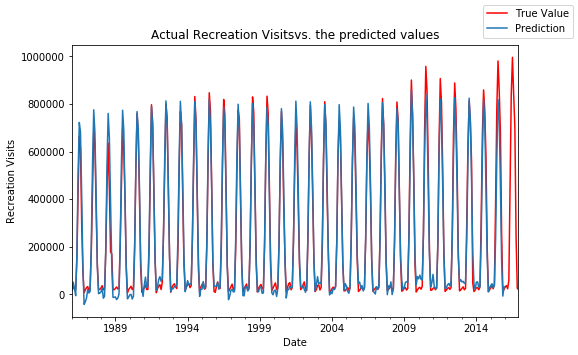

In [19]:
def plot_mod_fit(df, col):
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax, label = 'True Value')
    df.loc[:, 'scores'].plot(ax = ax, label='Prediction') 
    ax.set_title('Actual ' + col + 'vs. the predicted values') # Give the plot a main title
    ax.set_xlabel('Date') # Set text for the x axis
    ax.set_ylabel(col)# Set text for y axis
    fig.legend()
    
plot_mod_fit(df, 'Recreation Visits')   

Using the linear model to train months data, the prediction is not bad for the training data.

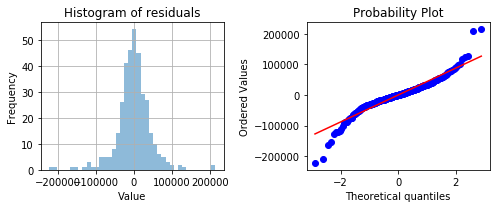

In [20]:
def dist_ts(ts, lab = '', bins = 40):
    import scipy.stats as ss
    ## Setup a figure with two subplots side by side
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    ## Plot the histogram with labels
    ts.hist(ax = ax1, bins = bins, alpha = 0.5)
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram of ' + lab)
    ## Plot the q-q plot on the other axes
    ss.probplot(ts, plot = ax2)
    f.tight_layout()
    
def plot_ts(ts, lab = ''):
    plt.plot(ts)
    plt.title('Time series plot of ' + lab)
    plt.ylabel('Value')
    plt.xlabel('Date')

    
dist_ts(df.loc[:'2015-12-31', 'resids'], lab='residuals')

In [21]:
df.loc[:'2015-12-31', 'resids'].index

DatetimeIndex(['1986-01-01', '1986-02-01', '1986-03-01', '1986-04-01',
               '1986-05-01', '1986-06-01', '1986-07-01', '1986-08-01',
               '1986-09-01', '1986-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='date', length=360, freq=None)

Text(0.5, 1.0, 'residuals for training data using linear regression')

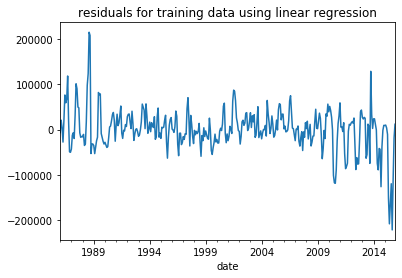

In [22]:
df.loc[:'2015-12-31', 'resids'].plot()
plt.title('residuals for training data using linear regression')

From the histogram, not a nice normal distributed histogram. But in Q-Q plot, data lines quite linearly. So I would say residuals approximately normally distributed.

The time series plot of the residual shows no periodic behavior.

In [23]:
def ks_test(dat, name, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic for '+ name + ' = ' + str(ks_statisic))
    print('P-value for ' + name + '= ' + str(pvalue))
ks_test(df.loc[:'2015-12-31', 'resids'], 'residuals') 

KS-statistic for residuals = 0.5027777777777778
P-value for residuals= 9.643541691678304e-85


Based on the statitics, p-value is way more smaller than the classic 0.05 threshold, suggesting we can reject the null hypothesis that residuals are not normally distributed. It implies that this regression is not a good regression (because for a good regression model, the residuals should follow a normal distribution)

To have a point of comparison, compute the root mean square error (RMSE) of the fit of the model for the last 12 months of the electric production time series.

In [24]:
def RMSE(ts, score):
    from math import sqrt
    rmse = sqrt(np.std(ts - score))
    return ('RMSE: %.2f'%rmse)

## Make the forecast for the next year (only the linear regression)
X2 = df.loc['2015-12-31':, features].values
print ('RMSE:',RMSE(df.loc['2015-12-31':, 'Recreation Visits'].values, mod_fit.predict(X2)))
print('Forecast means: %.2f' %df.loc['2015-1-31':, 'scores'].mean())

RMSE: RMSE: 328.26
Forecast means: 280839.77


RMSE is Root Mean Square Error, a standard way to measure the error of a model in predicting quantitative data. Here, the RMSE for linear regression of training data is reported to be 319.19, which is only 0.1% of the forcast mean.

Next, we take a look at the residuals for testing data using linear regression model.

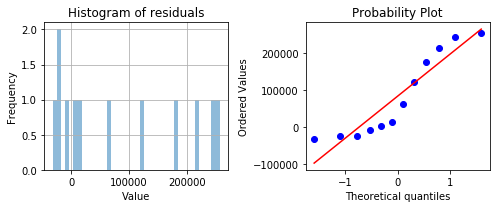

In [25]:
#Check whether the residual forcast from linear regression is normally distributed
resid_lr = (df.loc['2015-12-31':, 'Recreation Visits']- mod_fit.predict(X2))
dist_ts(resid_lr, lab='residuals')

From histogram, the residuals is not centered at zero. And data points are off in Q-Q plot. Using ks-test to see the normality.

In [26]:
ks_test(resid_lr, 'residual from linear regression')

KS-statistic for residual from linear regression = 0.6666666666666667
P-value for residual from linear regression= 8.838619131462826e-06


Based on the statitics, p-value is way more smaller than the classic 0.05 threshold, suggesting we can reject the null hypothesis that residuals are not normally distributed. It implies that this regression is not a good regression (because for a good regression model, the residuals should follow a normal distribution)

Next, we want to add ARIMA components into our model. We compute the ARIMA model using the residual. We will train this model without the last 12 months of data, then evaluate. Using auto_arima to find the optimal model for residual we calculated from linear regression.

In [27]:
stepwise_fit = auto_arima(df.resids[0:-12], start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12, max_P = 3, max_Q = 3,
                             start_P=1, start_Q=1, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=8181.273, BIC=8204.368, Time=3.358 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=8325.579, BIC=8333.278, Time=0.067 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=8252.711, BIC=8268.108, Time=0.640 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=8228.717, BIC=8244.115, Time=0.651 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=8323.819, BIC=8327.669, Time=0.066 seconds
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=8179.607, BIC=8198.853, Time=2.566 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)
Fit ARIMA(1,1,1)x(1,1,0,12) [intercept=True]; AIC=8196.796, BIC=8216.043, Time=2.625 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit ci

In [28]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  360
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -4084.803
Date:                            Fri, 24 Jul 2020   AIC                           8179.607
Time:                                    13:33:58   BIC                           8198.853
Sample:                                         0   HQIC                          8187.270
                                            - 360                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -9.3717     19.451     -0.482      0.630     -47.495      28.752
ar.L1          0.6039      0.047     12.757      0.000       0.511       0.697
ma.L1         -0.9939      0.042    -23.529      0.000      -1.077      -0.911
ma.S.L12      -0.5864      0.061     -9.683      0.000      -0.705      -0.468
sigma2      1.366e+09   1.07e-06   1.28e+15      0.000    1.37e+09    1.37e+09
===================================================================================
Ljung-Box (Q):                       41.39   Jarque-Bera (JB):               279.37
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.04
Prob(H) (two-sided):                  0.89   Kurtosis:                         7.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.82e+30. Standard errors may be unstable.
"""

Seasonal ARIMA, denoted as ARIMA (p, d, q) (P,D,Q)s.(p, d, q) are the non-seasonal parameters described above, while (P, D, Q) follow the same definition but are applied to the seasonal component of the time series. The term s is the periodicity of the time series (4 for quarterly periods, 12 for yearly periods, etc.).

In the summary output, the best model is SARIMAX(1, 1, 1)x(0, 1, 1, 12)

Setting the alpha to be 0.05, the coefficents of intercept is greater than alpha 0.05, implying that these coefficients are not statiscally significant and model is likely overfitting.

Still, the best model is SARIMAX(1, 1, 1)x(0, 1, 1, 12), which is going to be used in the following training.

In [29]:
import statsmodels.api as sm
#setup the training data
df.index = df.index.to_period('M')
y = df.loc[:'2015-12-31', 'resids']

#setup the best model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

#fit the model
resid_model = mod.fit()
resid_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             resids   No. Observations:                  360
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -3922.133
Date:                            Fri, 24 Jul 2020   AIC                           7852.265
Time:                                    13:33:59   BIC                           7867.498
Sample:                                01-31-1986   HQIC                          7858.339
                                     - 12-31-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6069      0.053     11.553      0.000       0.504       0.710
ma.L1         -0.9907      0.029    -34.053      0.000      -1.048      -0.934
ma.S.L12      -0.5974      0.049    -12.197      0.000      -0.693      -0.501
sigma2      1.366e+09   4.29e-12   3.18e+20      0.000    1.37e+09    1.37e+09
===================================================================================
Ljung-Box (Q):                       40.23   Jarque-Bera (JB):               270.35
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.08
Prob(H) (two-sided):                  0.86   Kurtosis:                         7.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.76e+36. Standard errors may be unstable.
"""

In [30]:
#use the last 12 months to make prediction 
start_index = len(df.loc[:'2015-12-31', 'resids'])
end_index = start_index + 11
pred_resids = resid_model.get_prediction(start=start_index,end=end_index)
#calculate the predictions mean from ARIMA residuals
pred= pred_resids.predicted_mean
pred

# Combine linear regression prediction and ARIMA prediction
df.loc['2016-1':, 'scores'] = mod_fit.predict(X2) + pred
final_pred = df.loc['2016-1':, 'scores']
final_pred

date
2016-01     65505.916511
2016-02     68244.817437
2016-03     32267.183220
2016-04     36099.659335
2016-05    128174.459388
2016-06    442969.540192
2016-07    719832.123907
2016-08    634404.159763
2016-09    302256.331708
2016-10    131301.835824
2016-11     48366.534197
2016-12     18106.055258
Freq: M, Name: scores, dtype: float64

The last 12 months forecast visits using linear regression, including the ARIMA component is shown above. We next plot the last 12 months prediction and the acutal values.

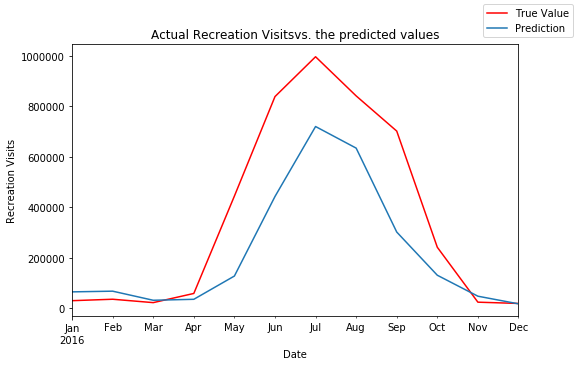

In [31]:
#plot the last 12 months prediction vs true value
plot_mod_fit(df.loc['2016-1':], 'Recreation Visits')  

The forecast for the last 12 months looks reasonable. The red, actual time series, and the prediction, in blue, look colse with prediction value is lower than true value.

Next, let's compute the RMSE and compare these results to the model with only trend and seasonal component. (Previous RMSE (only linear regression) is 328.26)

In [32]:
print( 'RMSE:', RMSE(df.loc['2016-1':, 'Recreation Visits'], df.loc['2013-1-31':, 'scores']))
print('Forecast means: %.2f' %df.loc['2016-1':, 'scores'].mean())

RMSE: RMSE: 407.02
Forecast means: 218960.72


RMSE is Root Mean Square Error, a standard way to measure the error of a model in predicting quantitative data. RMSE is relatively small compared to the fprecast mean. But interestingly, the RMSE of prediction using only the linear regression model increased , suggesting that adding the ARIMA model of the residuals for this forecast of the last 12 month doesn't improve the prediction. This is caused by the overfitting of the ARIMA model.

We then study the residuals of the predictions.

In [33]:
# calculate the residuals for the last 12 months 
# These are the residuals for the forecasting using both linear regression
# and ARIMA components
df.loc['2016-1':, 'resids'] = (df.loc['2016-1':, 'scores'] - 
    df.loc['2016-1':, 'Recreation Visits'])

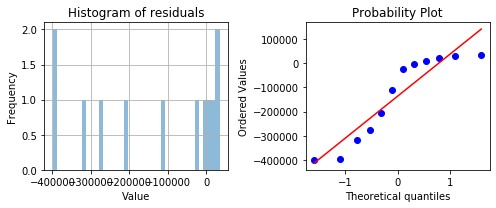

In [34]:
dist_ts(df.loc['2016-1':, 'resids'], lab='residuals')

From the histogram of residuals, it is not normally distributed. From the probability plot, some data points are off the line.

In [35]:
ks_test(df.loc['2012-12-31':, 'resids'], 'residuals')

KS-statistic for residuals = 0.5510204081632653
P-value for residuals= 1.6667421963602416e-14


Based on the statitics, p-value is way more smaller than the classic 0.05 threshold, suggesting we can reject the null hypothesis that residuals are not normally distributed. It implies that this regression with ARIMA component is not a good model (because for a good regression model, the residuals should follow a normal distribution)

We then calculate the confidence intervals of the prediction.I use conf_int to get the confidence interval of the ARIMA predictions, then added to the final prediction values. But first, let's look at how confidence interval changes as time moves to the future.

Text(0, 0.5, 'Visits')

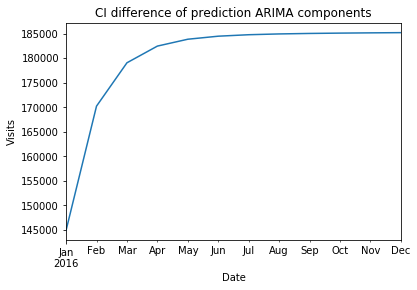

In [36]:
# get the confidence interval for prediction of residuals at alpha = 0.05
pred_ci =pred_resids.conf_int(alpha=0.05)
# calculate the range of confidence intervals
diff_ci = pred_ci['upper resids'] - pred_ci['lower resids'] 
diff_ci.plot()
plt.title('CI difference of prediction ARIMA components')
plt.xlabel('Date')
plt.ylabel('Visits')

From the CI difference plot, we can see that the confidence intervals are getting larger, then level off as time moves to the future.

Then we compare confidence intervals to the forecast means. Since we got the confidence interval from ARIMA predictions, we'll compare the ARIMA predictions means to ARIMA confidence interval.

In [37]:
# mean ARIMA prediction
print('ARIMA predictions')
print(pred)
print('\n')
print('Confidence interval of ARIMA predictions')
print(pred_ci)
print('\n')
print ('Mean for forecast means (only ARIMA): %.2f' %pred.mean())
print ('Mean for range of confidence interval (only ARIMA): %.2f' %diff_ci.mean())

ARIMA predictions
2016-01     12373.358531
2016-02      8841.002843
2016-03      2305.774544
2016-04     -7492.730286
2016-05   -100549.371191
2016-06   -139059.597573
2016-07    -98558.571440
2016-08    -82516.657574
2016-09   -154846.931566
2016-10    -48258.512753
2016-11     -8654.830593
2016-12      2844.555858
Freq: M, dtype: float64


Confidence interval of ARIMA predictions
          lower resids  upper resids
2016-01  -60073.535857  84820.252918
2016-02  -76258.851886  93940.857573
2016-03  -87212.111581  91823.660669
2016-04  -98711.737155  83726.276583
2016-05 -192467.902522  -8630.839859
2016-06 -231287.314643 -46831.880504
2016-07 -190935.890428  -6181.252452
2016-08 -174974.784101   9941.468954
2016-09 -247354.380697 -62339.482435
2016-10 -140799.945609  44282.920104
2016-11 -101222.323723  83912.662537
2016-12  -89744.698225  95433.809941


Mean for forecast means (only ARIMA): -51131.04
Mean for range of confidence interval (only ARIMA): 179578.49


Some ARIMA predictions are negative, meaning that some season/time have negative impact on visits.


Confidence interval (mean) is relatively large compared to the forecasted mean, suggesting that predictions of visits have large intervals.

In [38]:
#create the upper and lower line for final predictions.
upper =pred_ci['upper resids'] + df.loc['2016-1':, 'scores']
lower =df.loc['2016-1':, 'scores'] + pred_ci['lower resids']

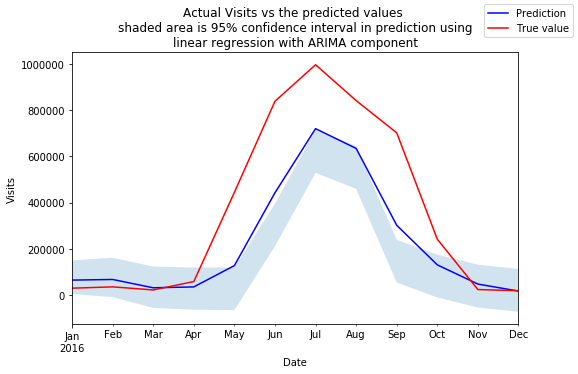

In [39]:
fig = plt.figure(figsize=(8, 5)) # set plot area
ax = fig.gca() # define axis  
df.loc['2016-1':, 'scores'].plot(color = 'b', label = 'Prediction')

df.loc['2016-1':, 'Recreation Visits'].plot(color ='r', label='True value')
ax.fill_between(lower.index, upper, lower, alpha=0.2)
ax.set_title('Actual Visits vs the predicted values \n' +
            'shaded area is 95% confidence interval in prediction using\n' +
            'linear regression with ARIMA component') # Give the plot a main title
ax.set_xlabel('Date') # Set text for the x axis
ax.set_ylabel('Visits')# Set t"ext for y axis
fig.legend();

It's interesting that the confidence interval is below the prediction from May to Sep, which are even lower than true value. It seems like that model makes quite off predictions during this time. This could be caused by overfitting of model. 

In [42]:
from sklearn.metrics import f1_score
f1 = f1_score(df.loc['2016-1':, 'Recreation Visits'], df.loc['2016-1':, 'scores'])
print('f1 score: %.3f'% recall)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [48]:
df.loc['2016-1':, 'Recreation Visits']

date
2016-01     30621
2016-02     36327
2016-03     22924
2016-04     59253
2016-05    444630
2016-06    838316
2016-07    995917
2016-08    841036
2016-09    701754
2016-10    242004
2016-11     24710
2016-12     19685
Freq: M, Name: Recreation Visits, dtype: int64

In [49]:
df.loc['2016-1':, 'scores']

date
2016-01     65505.916511
2016-02     68244.817437
2016-03     32267.183220
2016-04     36099.659335
2016-05    128174.459388
2016-06    442969.540192
2016-07    719832.123907
2016-08    634404.159763
2016-09    302256.331708
2016-10    131301.835824
2016-11     48366.534197
2016-12     18106.055258
Freq: M, Name: scores, dtype: float64

In [50]:
result = pd.DataFrame ({'y_pre': df.loc['2016-1':, 'scores'],
         'true value': df.loc['2016-1':, 'Recreation Visits']})

In [51]:
result

,y_pre,true value
date,,
2016-01,65505.916511,30621
2016-02,68244.817437,36327
2016-03,32267.183220,22924
2016-04,36099.659335,59253
2016-05,128174.459388,444630
2016-06,442969.540192,838316
2016-07,719832.123907,995917
2016-08,634404.159763,841036
2016-09,302256.331708,701754


In [54]:
from sklearn.metrics import r2_score
r2_score(result['true value'], result ['y_pre'])

0.6658110533643635